# Project: Train a Quadcopter How to Fly

Design an agent to fly a quadcopter, and then train it using a reinforcement learning algorithm of your choice! 

Try to apply the techniques you have learnt, but also feel free to come up with innovative ideas and test them.

## Instructions

Take a look at the files in the directory to better understand the structure of the project. 

- `task.py`: Define your task (environment) in this file.
- `agents/`: Folder containing reinforcement learning agents.
    - `policy_search.py`: A sample agent has been provided here.
    - `agent.py`: Develop your agent here.
- `physics_sim.py`: This file contains the simulator for the quadcopter.  **DO NOT MODIFY THIS FILE**.

For this project, you will define your own task in `task.py`.  Although we have provided a example task to get you started, you are encouraged to change it.  Later in this notebook, you will learn more about how to amend this file.

You will also design a reinforcement learning agent in `agent.py` to complete your chosen task.  

You are welcome to create any additional files to help you to organize your code.  For instance, you may find it useful to define a `model.py` file defining any needed neural network architectures.

## Controlling the Quadcopter

We provide a sample agent in the code cell below to show you how to use the sim to control the quadcopter.  This agent is even simpler than the sample agent that you'll examine (in `agents/policy_search.py`) later in this notebook!

The agent controls the quadcopter by setting the revolutions per second on each of its four rotors.  The provided agent in the `Basic_Agent` class below always selects a random action for each of the four rotors.  These four speeds are returned by the `act` method as a list of four floating-point numbers.  

For this project, the agent that you will implement in `agents/agent.py` will have a far more intelligent method for selecting actions!

In [1]:
import random

class Basic_Agent():
    def __init__(self, task):
        self.task = task
    
    def act(self):
        new_thrust = random.gauss(450., 25.)
        return [new_thrust + random.gauss(0., 1.) for x in range(4)]

Run the code cell below to have the agent select actions to control the quadcopter.  

Feel free to change the provided values of `runtime`, `init_pose`, `init_velocities`, and `init_angle_velocities` below to change the starting conditions of the quadcopter.

The `labels` list below annotates statistics that are saved while running the simulation.  All of this information is saved in a text file `data.txt` and stored in the dictionary `results`.  

In [2]:
%load_ext autoreload
%autoreload 2

import csv
import numpy as np
from task import Task

# Modify the values below to give the quadcopter a different starting position.
runtime = 5.                                     # time limit of the episode
init_pose = np.array([0., 0., 10., 0., 0., 0.])  # initial pose
init_velocities = np.array([0., 0., 0.])         # initial velocities
init_angle_velocities = np.array([0., 0., 0.])   # initial angle velocities
file_output = 'data.txt'                         # file name for saved results

# Setup
task = Task(init_pose, init_velocities, init_angle_velocities, runtime)
agent = Basic_Agent(task)
done = False
labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
results = {x : [] for x in labels}

# Run the simulation, and save the results.
with open(file_output, 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(labels)
    while True:
        rotor_speeds = agent.act()
        _, _, done = task.step(rotor_speeds)
        to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(rotor_speeds)
        for ii in range(len(labels)):
            results[labels[ii]].append(to_write[ii])
        writer.writerow(to_write)
        if done:
            break

Run the code cell below to visualize how the position of the quadcopter evolved during the simulation.

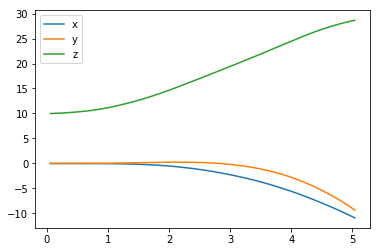

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(results['time'], results['x'], label='x')
plt.plot(results['time'], results['y'], label='y')
plt.plot(results['time'], results['z'], label='z')
plt.legend()
_ = plt.ylim()

The next code cell visualizes the velocity of the quadcopter.

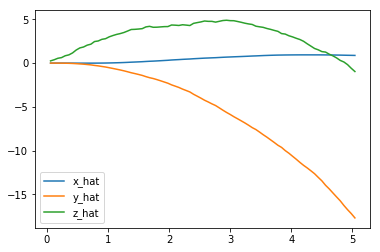

In [4]:
plt.plot(results['time'], results['x_velocity'], label='x_hat')
plt.plot(results['time'], results['y_velocity'], label='y_hat')
plt.plot(results['time'], results['z_velocity'], label='z_hat')
plt.legend()
_ = plt.ylim()

Next, you can plot the Euler angles (the rotation of the quadcopter over the $x$-, $y$-, and $z$-axes),

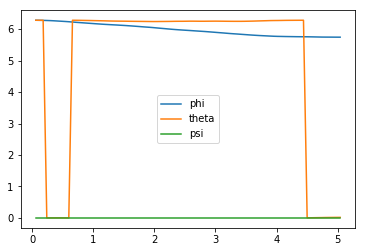

In [5]:
plt.plot(results['time'], results['phi'], label='phi')
plt.plot(results['time'], results['theta'], label='theta')
plt.plot(results['time'], results['psi'], label='psi')
plt.legend()
_ = plt.ylim()

before plotting the velocities (in radians per second) corresponding to each of the Euler angles.

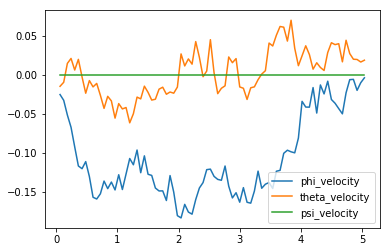

In [6]:
plt.plot(results['time'], results['phi_velocity'], label='phi_velocity')
plt.plot(results['time'], results['theta_velocity'], label='theta_velocity')
plt.plot(results['time'], results['psi_velocity'], label='psi_velocity')
plt.legend()
_ = plt.ylim()

Finally, you can use the code cell below to print the agent's choice of actions.  

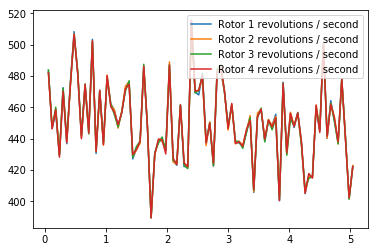

In [7]:
plt.plot(results['time'], results['rotor_speed1'], label='Rotor 1 revolutions / second')
plt.plot(results['time'], results['rotor_speed2'], label='Rotor 2 revolutions / second')
plt.plot(results['time'], results['rotor_speed3'], label='Rotor 3 revolutions / second')
plt.plot(results['time'], results['rotor_speed4'], label='Rotor 4 revolutions / second')
plt.legend()
_ = plt.ylim()

When specifying a task, you will derive the environment state from the simulator.  Run the code cell below to print the values of the following variables at the end of the simulation:
- `task.sim.pose` (the position of the quadcopter in ($x,y,z$) dimensions and the Euler angles),
- `task.sim.v` (the velocity of the quadcopter in ($x,y,z$) dimensions), and
- `task.sim.angular_v` (radians/second for each of the three Euler angles).

In [4]:
# the pose, velocity, and angular velocity of the quadcopter at the end of the episode
print(task.sim.pose)
print(task.sim.v)
print(task.sim.angular_v)

[-26.25267517 -23.56262612  16.00167487   5.78540743   0.91821053   0.        ]
[-16.06993212 -13.21642756  -8.86086098]
[-0.11391833  0.16359644  0.        ]


In the sample task in `task.py`, we use the 6-dimensional pose of the quadcopter to construct the state of the environment at each timestep.  However, when amending the task for your purposes, you are welcome to expand the size of the state vector by including the velocity information.  You can use any combination of the pose, velocity, and angular velocity - feel free to tinker here, and construct the state to suit your task.

## The Task

A sample task has been provided for you in `task.py`.  Open this file in a new window now. 

The `__init__()` method is used to initialize several variables that are needed to specify the task.  
- The simulator is initialized as an instance of the `PhysicsSim` class (from `physics_sim.py`).  
- Inspired by the methodology in the original DDPG paper, we make use of action repeats.  For each timestep of the agent, we step the simulation `action_repeats` timesteps.  If you are not familiar with action repeats, please read the **Results** section in [the DDPG paper](https://arxiv.org/abs/1509.02971).
- We set the number of elements in the state vector.  For the sample task, we only work with the 6-dimensional pose information.  To set the size of the state (`state_size`), we must take action repeats into account.  
- The environment will always have a 4-dimensional action space, with one entry for each rotor (`action_size=4`). You can set the minimum (`action_low`) and maximum (`action_high`) values of each entry here.
- The sample task in this provided file is for the agent to reach a target position.  We specify that target position as a variable.

The `reset()` method resets the simulator.  The agent should call this method every time the episode ends.  You can see an example of this in the code cell below.

The `step()` method is perhaps the most important.  It accepts the agent's choice of action `rotor_speeds`, which is used to prepare the next state to pass on to the agent.  Then, the reward is computed from `get_reward()`.  The episode is considered done if the time limit has been exceeded, or the quadcopter has travelled outside of the bounds of the simulation.

In the next section, you will learn how to test the performance of an agent on this task.

## The Agent

The sample agent given in `agents/policy_search.py` uses a very simplistic linear policy to directly compute the action vector as a dot product of the state vector and a matrix of weights. Then, it randomly perturbs the parameters by adding some Gaussian noise, to produce a different policy. Based on the average reward obtained in each episode (`score`), it keeps track of the best set of parameters found so far, how the score is changing, and accordingly tweaks a scaling factor to widen or tighten the noise.

Run the code cell below to see how the agent performs on the sample task.

In [13]:
import sys
import pandas as pd
from agents.policy_search import PolicySearch_Agent
from task import Task

num_episodes = 2000
target_pos = np.array([0., 0., 10.])
task = Task(target_pos=target_pos)
agent = PolicySearch_Agent(task) 

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    while True:
        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        agent.step(reward, done)
        state = next_state
        if done:
            print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f}), noise_scale = {}".format(
                i_episode, agent.score, agent.best_score, agent.noise_scale), end="")  # [debug]
            break
    sys.stdout.flush()

Episode =  245, score =  -0.069 (best =   0.169), noise_scale = 3.255

KeyboardInterrupt: 

This agent should perform very poorly on this task.  And that's where you come in!

## Define the Task, Design the Agent, and Train Your Agent!

Amend `task.py` to specify a task of your choosing.  If you're unsure what kind of task to specify, you may like to teach your quadcopter to takeoff, hover in place, land softly, or reach a target pose.  

After specifying your task, use the sample agent in `agents/policy_search.py` as a template to define your own agent in `agents/agent.py`.  You can borrow whatever you need from the sample agent, including ideas on how you might modularize your code (using helper methods like `act()`, `learn()`, `reset_episode()`, etc.).

Note that it is **highly unlikely** that the first agent and task that you specify will learn well.  You will likely have to tweak various hyperparameters and the reward function for your task until you arrive at reasonably good behavior.

As you develop your agent, it's important to keep an eye on how it's performing. Use the code above as inspiration to build in a mechanism to log/save the total rewards obtained in each episode to file.  If the episode rewards are gradually increasing, this is an indication that your agent is learning.

In [31]:
## TODO: Train your agent here.

import sys
import pandas as pd
from agents.agent import DDPG
from task import Task

rewards_list = []
num_episodes = 1500
target_pos = np.array([0., 0., 10.])
task = Task(target_pos=target_pos)
agent = DDPG(task) 

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    while True:
        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        agent.step(action, reward, next_state, done)
        state = next_state
        if done:
            print("\rEpisode = {:4d}, score = {:7.3f}".format(
                i_episode, agent.score), end="")  # [debug]
            rewards_list.append((i_episode, agent.score))
            break
    sys.stdout.flush()

Episode = 1500, score =   0.645

## Plot the Rewards

Once you are satisfied with your performance, plot the episode rewards, either from a single run, or averaged over multiple runs. 

Text(0,0.5,'Total Reward')

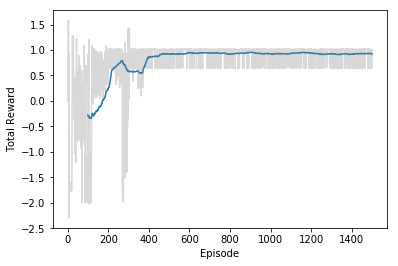

In [32]:
## TODO: Plot the rewards.
%matplotlib inline
import matplotlib.pyplot as plt

def running_mean(x, N):
    cumsum = np.cumsum(np.insert(x, 0, 0)) 
    return (cumsum[N:] - cumsum[:-N]) / N 

eps, rews = np.array(rewards_list).T
smoothed_rews = running_mean(rews, 100)
plt.plot(eps[-len(smoothed_rews):], smoothed_rews)
plt.plot(eps, rews, color='grey', alpha=0.3)
plt.xlabel('Episode')
plt.ylabel('Total Reward')

## Reflections

**Question 1**: Describe the task that you specified in `task.py`.  How did you design the reward function?

**Answer**:
Goal of my task is to move quadracoptor from initial position of 0,0,0 in x, y and z coordinates to target position 0,0,10. So here I am only considering vertical movement from 0 to 10 in z direction. 

Initialized action range is from low (0) to high (900) with repeat action of 3(for each simulation action is repeated 3 times).  

Reset function is used to reset state at start of each new episode. Step function is used to get next_state and reward from current state. Reward is added cumulatively for each repeat action. 

Reward function is designed to give more reward if current position of quadracoptor is close to target postion. Difference between current position and target position is reduced when quadracoptor approaches target. So abolute sum for all three coordinates is mutliplied with scalar decimal and resulting product is reduced from 1. This function value will approach 1 as target pos of 0,0,10 is reached. Finally reward return is clipped in range -1 to +1 so that large negative rewards are clipped to -1 to avoid divergence during training process.

If the episode finishes (when done=True) we are giving huge positive reward of +10 to the agent. This acts as booster or great encouragement to learning when episode is done (agent reaching target position) Rewarding such moves encourages agent to take more deterministic action towards finishing episode.  




**Question 2**: Discuss your agent briefly, using the following questions as a guide:

- What learning algorithm(s) did you try? What worked best for you?
- What was your final choice of hyperparameters (such as $\alpha$, $\gamma$, $\epsilon$, etc.)?
- What neural network architecture did you use (if any)? Specify layers, sizes, activation functions, etc.

**Answer**:
- DDPG(Deep Deterministic Policy Gradient) algorithm worked best for me given the continus space and action space. 
- I tried tunning various hyperparamter and following worked best for me. 
    - Learning Rate = 0.001
    - gamma = 0.99
    - tau = 0.01
    - Regularizer = 0.01
    - theta = 0.15 
    - mu = 0
    - sigma = 0.2
    - Replay buffer size = 100000
    - batch_size = 64 
    
- I tried different neural network archtitecture changing number of units in hidden layer, trying different activation functions in hidden layer, adding kernal/activity regularizers and adding batch normalization after each layer. Tried following different archtitecture for actor and critic model.  

    Actor Model 
    
    
    Hidden Layer Size	Regularizer	Activation	Batch Normalization
    
    32X64X32		    kernal		relu		No
    
    32X64X32		    kernal		linear		No
    
    32X64X32		    kernal		relu		yes
    
    100X200X100		    kernal		linear		yes
    
    100X200X100		    kernal		relu		No    -- Worked best
    
    100X200X100		    kernal		relu		yes	
    
    
    Critic Model 
    
    Hidden Layer Size	Regularizer	Activation	Batch Normalization
    
    32X64      		    kernal		relu		No
    
    32X64    		    kernal		linear		No
    
    32X64   		    kernal		relu		yes
    
    100X200 		    kernal		linear		yes
    
    100X200 		    kernal		relu		No   -- Worked sest
    
    100X200 		    kernal		relu		yes

- Agent Description:
    - Initialization - In this Agent class constructor, I have initialized all variable including state_size, action_size, local and target actor/critic models and respective initial weights, replay buffer parameters, exploration nosie paramters, algorithm paramters and initial score is set to 0. 
    - reset_episode - This function will return initial state of the environment and its called at the start of each new episode. Total reward and count is initialized to 0 in this function. 
    - Act - This functions returns action predicted from local actor when current state is passed as input. Some random noise is added to each of the four action dimensions. 
    - Step - In step function we are storing experiance tuple(state, action, reward, next_state and done) in replay memory. Then we are adding step reward to total reward and increasing counter. If replay memory has enough batch samples then we are randomly sampling tuples from replay buffer to learn from these randomized batch experiance. At last next state is rolled over to current state when learning is done from batch. 
    - learn - In this function agent performs deep learning on actor and critic models. 
            a) Experiance tuples are segregated into different list. 
            b) next_action is predicted from list of next state when passed to actor target as input. 
            c) Q_target_next is predicted from batch of next_state and next_action when passed as input to critic target. 
            d) Current Q_target is computed from Q_target_next by applying formula.
            e) Local Critic model is trained from batch of current input state/action and Q_targets
            d) action_gradient returned from trained local critic is used to train local actor when current states and action_gradients is passed as input. 
            e) Local critic and actor model trained weights are copied over to target critic and actor model through soft update. 
    - soft_update - In this function we are updating target model weights from local model through formula (target_weights = tau * local_weights + (1-tau) * target_weights)
    - Replay Buffer - This function is used by agent to store and sample tuples ("state", "action", "reward", "next_state", "done") as experiance in memory buffer. 
    - OUNoise - Ornstein-Uhlenbeck process is used to generate random noise from the input sample. It uses parameter mu, theta and sigma to randomly generate noise.  
     
    
    

**Question 3**: Using the episode rewards plot, discuss how the agent learned over time.

- Was it an easy task to learn or hard?
- Was there a gradual learning curve, or an aha moment?
- How good was the final performance of the agent? (e.g. mean rewards over the last 10 episodes)

**Answer**:

- There were several iterations of re-run I had to try with different hyperparaamter and archtitect of NN with changes in reward function to plot agent learning. I used score of reward which is average reward per episode. Also I plotted rolling mean of score over last 100 episode to visualize slope of learning curve. So it wasn't easy to come to some optimal policy. 
    
- Initial part of learning show oscillations in score plot where agent is making several random moves with good and bad rewards. As agent gradually learns its action becomes more deterministic and osicllations reduces as can be seen froms solid blue line (rolling mean of last 100 episode) showing gradual increase in score with increasing episode. 
    
- Agent performance looks good but not optimal as agent stop learning after 500 episode and score functions stagnates with frequent oscillations. From episode 500 to 1500 agents oscillates and shows stagnation in rolling mean score as if agents has reached local optima and its not able to bump through local optima.

**Question 4**: Briefly summarize your experience working on this project. You can use the following prompts for ideas.

- What was the hardest part of the project? (e.g. getting started, plotting, specifying the task, etc.)
- Did you find anything interesting in how the quadcopter or your agent behaved?

**Answer**:

Getting started was hardest part of the project as I had to fully understand how DDPG algorithm works and get some intuitive sense of how learning is taking place with actor, critic and agent. So to get concept clear I had to revisit lesson videos on Policy gradients and Actor/Critic model multiple times. After this I had to fully understand Physics simulation model to understand how task can be defined given continous state and action space. Understand size/dimensionations of state/action space and how state is getting transformed after stepping with actions. I had to focus much on designing the suitable reward function as early several attempts were not so successful. Agent was not learning well and there was sudden drop in score reward. 


Yes it was interesting to learn that much of how agent learns is driven by how good reward function is design. I concluded that was what mostly driving the agent performance. Now obivously other hyperparameter tunning with network archtitecture do matters and I saw how agent changes learning curves when these parameters are changed. For example I observed large oscillation in reward score is reduced with reduction in learning rate passed to actor and critic model. 

Now with several experimentation with task, reward function, NN archtitecture, hyperparameters tunning, changing activations, regularizer function values and batch normalization etc best learning I could get is shown in above plotting. 

Below are some of the further improvements I think can be done. 
- More efficient reward function can be designed to optimize learning process. Reward function I used provides huge positive reward for taking good step but we have not penalized agent much with negative reward when agent takes bad steps.   
- Network oscillations can be further reduced by tunning hyperparamters. 
- Exploration parameters can be changed for random noise function to check its effect on overall learning. 
- Many times agent reaches local optima and keeps oscillating without further improving. Momentum can be added to learning process to get pass local optima. 
- More experimentation can be done with actor/critic model archtitecture to improve overall training process. 
